# Exercise 8.12
### Introduction
A) Plot the orbit of the Earth using the Verlet method with $h$ = 1 hour

B) Plot potential, kinetic, and total energy together.

C) Plot total energy seperately.

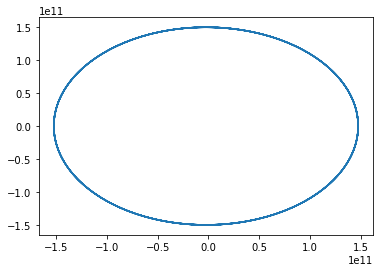

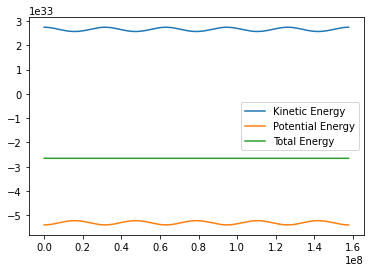

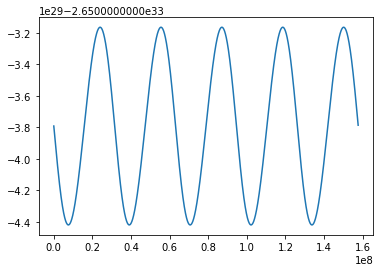

In [40]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.6738e-11
M = 1.9891e30
m = 5.9722e24
x = 1.471e11
vx = 0
y = 0
vy = 3.0287e4
v = np.array([vx,vy])
def acc(r,t):
    x = r[0]
    y = r[1]
    R = np.sqrt(x**2 + y**2)
    return np.array([-G*M*x/R**3,-G*M*y/R**3])


tf = 365*24*60*60*5
h = 60*60
t = 0
r = np.array([x,y])
xpoints = []
ypoints = []
tpoints = []
KE = []
UE=[]
TE=[]
v_half = v+1/2*h*acc(r,0)
while t< tf:
    t+=h
    r += h*v_half
    k = h*acc(r,t)
    v_half += k   
    xpoints.append(r[0])
    ypoints.append(r[1])
    tpoints.append(t)
    
    v_1 = v_half +1/2*k
    R = np.sqrt(r[0]**2+r[1]**2)
    U = -G*M*m/R
    V = np.sqrt(v_1[0]**2 + v_1[1]**2)
    K = 1/2*m*V*V
    T = U+K
    KE.append(K)
    UE.append(U)
    TE.append(T)
plt.plot(xpoints,ypoints)
plt.show()
plt.plot(tpoints,KE,label='Kinetic Energy')
plt.plot(tpoints,UE,label='Potential Energy')
plt.plot(tpoints,TE,label='Total Energy')
plt.legend()
plt.show()

plt.plot(tpoints,TE)
plt.show()

### Conclusion
This was so annoying. I kept getting a line with huge values. I couldn't figure out what I did wrong until I moved on to 8.13. I HAD THE WRONG G VALUE! I had 6.6738e11 instead of 6.6738e-11. BIG DIFFERENCE. 

Anyway, I think it is cool to see the very small change in total energy from this method, but how it returns.

# Exercise 8.13
### Introduction
Same as 8.12 but now using Bulirsh-Stoer Method

Then do it for Pluto too

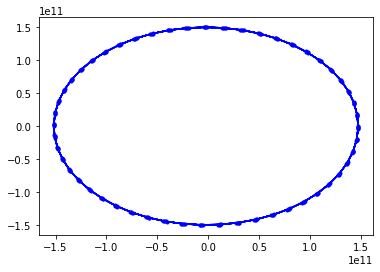

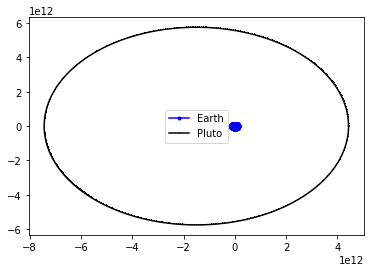

In [38]:
from math import sin,pi
from numpy import empty,array,arange,sqrt
from pylab import plot,show,xlim,ylim,legend


x = 1.470e11
y = 0
vx = 0
vy = 3.0287e4

a = 0.0
b = 365*24*60*60*5
H = 24*60*60*7     # Size of "big steps"
delta = 1e3/365/60/60/24     # Required position accuracy per unit time

def f(r):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    R = sqrt(x*x+y*y)
    G = 6.6738e-11
    M = 1.9891e30
    return array([vx,vy,-G*M*x/R**3,-G*M*y/R**3],float)

tpoints = arange(a,b,H)
xpoints = []
ypoints = []
r = array([x,y,vx,vy],float)

# Do the "big steps" of size H
for t in tpoints:

    xpoints.append(r[0])
    ypoints.append(r[1])

    # Do one modified midpoint step to get things started
    n = 1
    r1 = r + 0.5*H*f(r)
    r2 = r + H*f(r1)

    # The array R1 stores the first row of the
    # extrapolation table, which contains only the single
    # modified midpoint estimate of the solution at the
    # end of the interval
    R1 = empty([1,4],float)
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))

    # Now increase n until the required accuracy is reached
    error = 2*H*delta
    while error>H*delta:

        n += 1
        h = H/n

        # Modified midpoint method
        r1 = r + 0.5*h*f(r)
        r2 = r + h*f(r1)
        for i in range(n-1):
            r1 += h*f(r2)
            r2 += h*f(r1)

        # Calculate extrapolation estimates.  Arrays R1 and R2
        # hold the two most recent lines of the table
        R2 = R1
        R1 = empty([n,4],float)
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
        for m in range(1,n):
            epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + epsilon
        error = abs(epsilon[0])

    # Set r equal to the most accurate estimate we have,
    # before moving on to the next big step
    r = R1[n-1]

# Plot the results
plot(xpoints,ypoints,'b.-',label='Earth')
show()
plot(xpoints,ypoints,'b.-',label='Earth')



#PLUTO NOW


x = 4.4368e12
y = 0
vx = 0
vy = 6.1218e3

a = 0.0
b = 365*24*60*60*250
H = 24*60*60*7*25      # Size of "big steps" being 6 months ish
delta = 1e3/365/60/60/24     # Required position accuracy per unit time

def f(r):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    R = sqrt(x*x+y*y)
    G = 6.6738e-11
    M = 1.9891e30
    return array([vx,vy,-G*M*x/R**3,-G*M*y/R**3],float)

tpoints = arange(a,b,H)
xpoints = []
ypoints = []
r = array([x,y,vx,vy],float)

# Do the "big steps" of size H
for t in tpoints:

    xpoints.append(r[0])
    ypoints.append(r[1])

    # Do one modified midpoint step to get things started
    n = 1
    r1 = r + 0.5*H*f(r)
    r2 = r + H*f(r1)

    # The array R1 stores the first row of the
    # extrapolation table, which contains only the single
    # modified midpoint estimate of the solution at the
    # end of the interval
    R1 = empty([1,4],float)
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))

    # Now increase n until the required accuracy is reached
    error = 2*H*delta
    while error>H*delta:

        n += 1
        h = H/n

        # Modified midpoint method
        r1 = r + 0.5*h*f(r)
        r2 = r + h*f(r1)
        for i in range(n-1):
            r1 += h*f(r2)
            r2 += h*f(r1)

        # Calculate extrapolation estimates.  Arrays R1 and R2
        # hold the two most recent lines of the table
        R2 = R1
        R1 = empty([n,4],float)
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
        for m in range(1,n):
            epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + epsilon
        error = abs(epsilon[0])

    # Set r equal to the most accurate estimate we have,
    # before moving on to the next big step
    r = R1[n-1]

# Plot the results
plot(xpoints,ypoints,'k,-',label='Pluto')
legend()
show()

### Conclusion
This was easier than Verlet method. Probably because he gave us a skeleton code. I had to change it to take multiple dimensions, but not bad. 